In [2]:
# Importing a important libraries

import os, random 
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

In [3]:
img_arr = list()
label_arr = list()

In [4]:
# Reading file from dataset

for path in os.listdir():
    try:
        rnd_idx = random.sample(np.arange(len(os.listdir(path)) - 1).tolist(),900)
        for idx in rnd_idx:
            img = cv2.imread(path+"/"+os.listdir(path)[idx])
            img = img[:512, :512]
            img = cv2.resize(img,(150,150))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img_arr.append(img)
            label_arr.append(int(path))
    except Exception as e:
        print(e)

# Change Dataset to numpy array
img_arr = np.array(img_arr)

# Data normalization
img_arr = np.expand_dims(img_arr, -1) / 255.

label_arr = np.array(label_arr) - 1

# Changing label to one-hot encoded
label_arr = to_categorical(label_arr)

Sample larger than population or is negative
[WinError 267] The directory name is invalid: 'heatmap.png'
[WinError 267] The directory name is invalid: 'image_aug.png'
[WinError 267] The directory name is invalid: 'Lab6_Homework.ipynb'
[WinError 267] The directory name is invalid: 'model_best_weight.data-00000-of-00001'
[WinError 267] The directory name is invalid: 'model_best_weight.index'
[WinError 267] The directory name is invalid: 'my_best_model.epoch01-accuracy0.21.hdf5'
[WinError 267] The directory name is invalid: 'my_best_model.epoch06-accuracy0.24.hdf5'
[WinError 267] The directory name is invalid: 'my_best_model.epoch08-accuracy0.52.hdf5'
[WinError 267] The directory name is invalid: 'my_best_model.epoch11-accuracy0.54.hdf5'
[WinError 267] The directory name is invalid: 'my_best_model.epoch123-accuracy0.90.hdf5'
[WinError 267] The directory name is invalid: 'my_best_model.epoch16-accuracy0.57.hdf5'
[WinError 267] The directory name is invalid: 'my_best_model.epoch17-accuracy0

In [5]:
img_arr.shape

(4500, 150, 150, 1)

In [6]:
from sklearn.model_selection import train_test_split


# Train test split
x_train, x_test, y_train, y_test = train_test_split(img_arr, label_arr, test_size= 0.33,random_state=42)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

del img_arr, label_arr

(3015, 150, 150, 1) (1485, 150, 150, 1) (3015, 5) (1485, 5)


In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assgining Imagedatagenerator for image augmentation.

train_datagen = ImageDataGenerator(rescale=1.,
                                  rotation_range=40,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  zoom_range=0.2,
                                  horizontal_flip=True, vertical_flip=True,validation_split=0.2)


In [8]:
# Apply Imagedatagenerator to training set

train_generator = train_datagen.flow(x_train,y_train,batch_size = 50, subset = 'training')

# Apply Imagedatagenerator to testing set
val_generator = train_datagen.flow(x_train,y_train,batch_size = 50, subset = 'validation')

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout, LeakyReLU
from tensorflow.keras.regularizers import L2

In [10]:
# Creating CNN model

model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),
                 padding="same",
                 input_shape = (150,150,1),
                 activation='relu', kernel_regularizer=L2(), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(3,3),strides = (2,2)))
model.add(Conv2D(32,kernel_size=(3,3),
                 padding="same",
                 activation='relu', kernel_regularizer=L2(), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(3,3),strides = (2,2)))
model.add(Conv2D(64,kernel_size=(3,3),
                 padding="same",
                 activation='relu', kernel_regularizer=L2(), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(3,3),strides = (2,2)))
model.add(Conv2D(128,kernel_size=(3,3),
                 padding="same",
                 activation='relu', kernel_regularizer=L2(), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size =(3,3),strides = (2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu', kernel_regularizer=L2(), kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(5,activation = 'softmax', kernel_regularizer=L2(), kernel_initializer='he_normal'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      160       
                                                                 
 batch_normalization (BatchN  (None, 150, 150, 16)     64        
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 32)        4640      
                                                                 
 batch_normalization_1 (Batc  (None, 74, 74, 32)       128       
 hNormalization)                                                 
                                                        

In [11]:
# Loading the best result 

model.load_weights("./my_best_model.epoch943-accuracy0.96.hdf5")

In [12]:
import pandas as pd

# Creating crosstab table
y_hat = model.predict(x_test).argmax(axis = 1)    
y_actual = y_test.argmax(axis = 1)

df_crosstab = pd.crosstab(y_hat,y_actual)
df_crosstab

col_0,0,1,2,3,4
row_0,,,,,
0,291,7,0,0,0
1,11,304,19,2,29
2,3,1,277,1,2
3,0,0,0,253,4
4,0,2,0,19,260


In [13]:
from sklearn.metrics import classification_report

# Showing classification result
target_names = ['level 1', 'level 2', 'level 3','level 4', 'level 5']
print(classification_report(y_actual,y_hat,target_names=target_names,digits = 4))

              precision    recall  f1-score   support

     level 1     0.9765    0.9541    0.9652       305
     level 2     0.8329    0.9682    0.8954       314
     level 3     0.9754    0.9358    0.9552       296
     level 4     0.9844    0.9200    0.9511       275
     level 5     0.9253    0.8814    0.9028       295

    accuracy                         0.9327      1485
   macro avg     0.9389    0.9319    0.9339      1485
weighted avg     0.9372    0.9327    0.9334      1485



[Text(0.5, 30.5, 'Actual'),
 Text(48.5, 0.5, 'Predicted'),
 Text(0.5, 1.0, 'Model Prediction Result')]

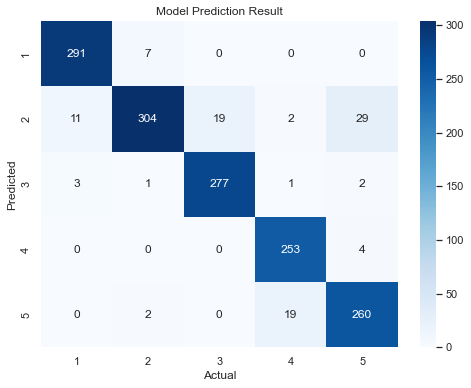

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
# Heatmap showing model prediction result

plt.rcParams['figure.figsize'] = (8,6)
sns.set()
ax = sns.heatmap(df_crosstab, annot = True, fmt="d", cmap = 'Blues',xticklabels=[1,2,3,4,5], yticklabels=[1,2,3,4,5])
ax.set(xlabel = 'Actual', ylabel = 'Predicted', title = 'Model Prediction Result')

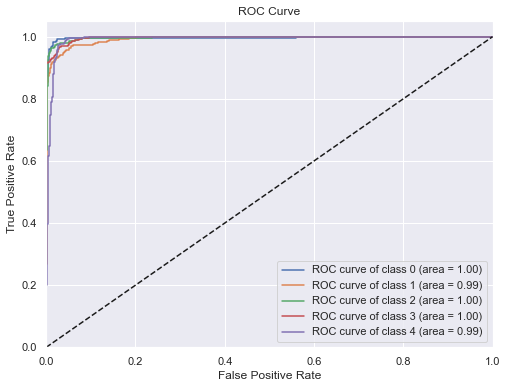

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


# Plotting ROC curve

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(5):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i],model.predict(x_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), model.predict(x_test).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

for i in range(5):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
